In [2]:
file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp_test2/test.json'
import json
with open(file) as f:
    data = json.load(f)
for k,entry in data.items():
    entry["human_eval_similarity"] = ""
with open(file, 'w') as f:
    json.dump(data, f, indent=4)

 


In [8]:
file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp_test2/test.json'
import json
with open(file) as f:
    data = json.load(f)

false_neg = 0
false_pos = 0
true_pos = 0
true_neg = 0
false_pos_list = []
false_neg_list = []
for k,entry in data.items():
    human = entry["human_eval_similarity"]
    agent = entry["similarity"]
    if agent not in ["Correct", "Incorrect", "Unknown"]:
        raise Exception(f"Agent similarity not in correct format:{k}")
    if human not in ["Correct", "Incorrect", "Unknown"]:
        raise Exception(f"Human similarity not in correct format:{k}")
    if human == "Correct":
        if agent == "Correct":
            true_pos += 1
        else:
            false_neg_list.append((k,entry))
            false_neg += 1
    elif human == "Incorrect":
        if agent == "Incorrect":
            true_neg += 1
        else:
            false_pos_list.append((k,entry))
            false_pos += 1
# print confusion matrix
print(f"True positives: {true_pos}, {true_pos/len(data)}")
print(f"True negatives: {true_neg}, {true_neg/len(data)}")
print(f"False positives: {false_pos}, {false_pos/len(data)}")
print(f"False negatives: {false_neg},  {false_neg/len(data)}")




True positives: 55, 0.4583333333333333
True negatives: 48, 0.4
False positives: 3, 0.025
False negatives: 14,  0.11666666666666667


In [10]:
# print false positives
print("False positives (agent thought correct, but not):")

for k,entry in false_pos_list:
    print(k,)
    print("Truths:")
    print(entry["ground_truths"])
    print("Preds:")
    print(entry["prediction"])

False positives (agent thought correct, but not):
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/10-frame-pairs/pair2
Truths:
['Move the green triangle block B1 to the top left corner.', 'Move to top left with block B1', 'Push block B1 (green triangle) half way to the top left', 'Move block B1 to the top-left corner.']
Preds:
None of the above. The correct subgoal would be: Move R and B1 upwards towards the top of the arena.
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/40-frame-pairs/pair9
Truths:
['Move the green square block B1 to the top left corner.', 'Move to bottom and pick up block B1 and move to top left with block B1', 'Grasp B1 and move it to the top left', 'Move block B1 to the top-left corner of the arena.']
Preds:
Move to the top of the arena while holding block B1.
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/80-frame-pairs/pair1
Truths:
['Move the green square block B1 to the top left corner.', 'Move to bottom and pick up block B1 and

Why these mistakes happened:
- 1. it thought top is good enough for top left, because one of the ground truths said halfway to top left. Arguable, not a huge error.
- 2. okay same error, will need to specify this.
- 3. same error


- All of these can be fixed by specifying top left is not the same as top.


In [11]:
# print false negatives
print("False negatives (agent thought incorrect, but correct):")
for k,entry in false_neg_list:
    print(k,)
    print("Truths:")
    print(entry["ground_truths"])
    print("Preds:")
    print(entry["prediction"])

False negatives (agent thought incorrect, but correct):
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/20-frame-pairs/pair1
Truths:
['Grab the green square block B1.', 'Move to bottom and place block B1', "Grasp B1 and then spin around so that you're facing upwards", 'Move to block B1 and pick it up.']
Preds:
Pick up B1.
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/20-frame-pairs/pair6
Truths:
['Move the blue square block B1 towards the top left corner.', 'Move to top left with block B1', "Spin around to face up and a little bit to the left while grasping B1, then push B1 forward so that it's about two thirds of the way to the top of the arena", 'Move block B1 to the top-left corner.']
Preds:
Move B1 slightly upward within the central area of the arena.
/Users/alexandrasouly/code/chai/magical/frame_pairs/Task1/20-frame-pairs/pair9
Truths:
['Release the green square block B1 in the top left corner.', 'Move to top left with block B1', 'Release B1', 'Release block 

- 1. Didn't get that pick up was enough. Although one of the labels was wrong
- 2. Was actually hard to tell without looking at pic, fair enough
- 3. Maintain position vs release, kinda hard to tell fair enough
- 4. Doesn't understand that the robot is moving the block
- 5. Didint' get that picking up was enough
- 6. Doesn't understadn robot is doing the picking up
- 7. Didn't get that picking up was enough
- 8. fair enough
- 9. bad ground truth label was confusing
- 10. bad label was confusing
- 11. fair enough
- 12. didn't get that the agent is going towards a block to pick it up 
- 13. bad labels
- 14. bad labels

- Maybe specify grab and pick up are the same thing?
- And that if one of the ground truth says pick up only, then predicting pick up only is fine.
- specify that move R and B1 is the same as moving B1, because the R is moving it
- the robot is usually moving towards a block to pick it up
- Maybe go trough the subgoals and check if they match one by one. to fix the pick up issue.

This would fix 10/14 errors which is pretty good

# New prompts:

- get new prompt
- eval with it (careful not to overwrite stuff!!!!)
- add your predictions
- check how you are doing now, hopefully all good

In [5]:
file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp_test2/test.json'
import json
with open(file) as f:
    orig_data = json.load(f)

print(orig_data)
file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/quick_eval/test.json'
import json
with open(file) as f:
    new_data = json.load(f)

for k,entry in new_data.items():
    entry["human_eval_similarity"] = orig_data[k]["human_eval_similarity"]

false_neg = 0
false_pos = 0
true_pos = 0
true_neg = 0
false_pos_list = []
false_neg_list = []
for k,entry in new_data.items():
    human = entry["human_eval_similarity"]
    agent = entry["similarity"]
    if agent not in ["Correct", "Incorrect", "Unknown"]:
        raise Exception(f"Agent similarity not in correct format:{k}")
    if human not in ["Correct", "Incorrect", "Unknown"]:
        raise Exception(f"Human similarity not in correct format:{k}")
    if human == "Correct":
        if agent == "Correct":
            true_pos += 1
        else:
            false_neg_list.append((k,entry))
            false_neg += 1
    elif human == "Incorrect":
        if agent == "Incorrect":
            true_neg += 1
        else:
            false_pos_list.append((k,entry))
            false_pos += 1
# print confusion matrix
print(f"True positives: {true_pos}, {true_pos/len(orig_data)}")
print(f"True negatives: {true_neg}, {true_neg/len(orig_data)}")
print(f"False positives: {false_pos}, {false_pos/len(orig_data)}")
print(f"False negatives: {false_neg},  {false_neg/len(orig_data)}")



{'/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task1/10-frame-pairs/pair1': {'ground_truths': ['Move to green square block B1.', 'Move to bottom and pick up block B1', 'Grasp block block B1 (green square)', 'Pick up block B1.'], 'prediction': 'Pick up B1.', 'similarity': 'Correct', 'human_eval_similarity': 'Correct'}, '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task1/10-frame-pairs/pair6': {'ground_truths': ['Move the blue square block B1 upwards.', 'Move to middle with block B1', 'Spin around to the right so that B1 moves up by about a third of the arena', 'Carry block B1 to the center of the arena.'], 'prediction': 'Move to the center of the arena while holding B1.', 'similarity': 'Correct', 'human_eval_similarity': 'Correct'}, '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task1/10-frame-pairs/pair8': {'ground_truths': ['Back away from the yellow triangle block B1.', 'Move to top left and place block B1', 'Move backward into the center of the gri

In [6]:
print("False positives (agent thought correct, but not):")

for k,entry in false_pos_list:
    print(k,)
    print("Truths:")
    print(entry["ground_truths"])
    print("Preds:")
    print(entry["prediction"])

False positives (agent thought correct, but not):


In [7]:
# print false negatives
print("False negatives (agent thought incorrect, but correct):")
for k,entry in false_neg_list:
    print(k,)
    print("Truths:")
    print(entry["ground_truths"])
    print("Preds:")
    print(entry["prediction"])

False negatives (agent thought incorrect, but correct):
/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task1/20-frame-pairs/pair6
Truths:
['Move the blue square block B1 towards the top left corner.', 'Move towards the top left with block B1', "Spin around to face up and a little bit to the left while grasping B1, then push B1 forward so that it's about two thirds of the way to the top of the arena", 'Move block B1 to the top-left corner.']
Preds:
Move B1 slightly upward within the central area of the arena.
/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task1/20-frame-pairs/pair9
Truths:
['Release the green square block B1 in the top left corner.', 'Move to top left with block B1', 'Release B1', 'Release block B1.']
Preds:
Maintain current position with block B1.
/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/Task2/10-frame-pairs/pair7
Truths:
['Back away from the block B1 in the special area SA1.', 'Move towards special area SA1 with block B1 and place i

# Compare the eval results of different tmemps

Saved /Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/bars_Task1.png
Saved /Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/bars_Task2.png
Saved /Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/bars_Task3.png


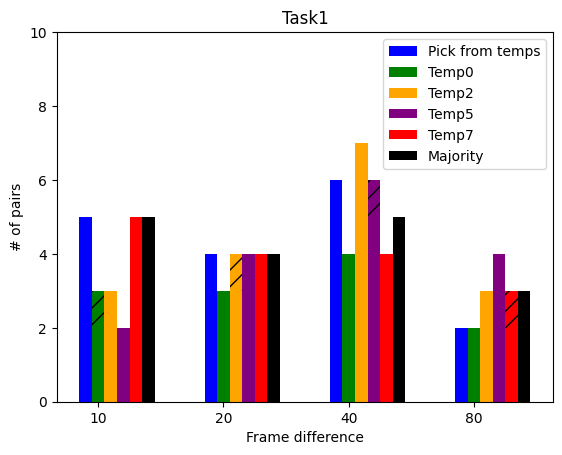

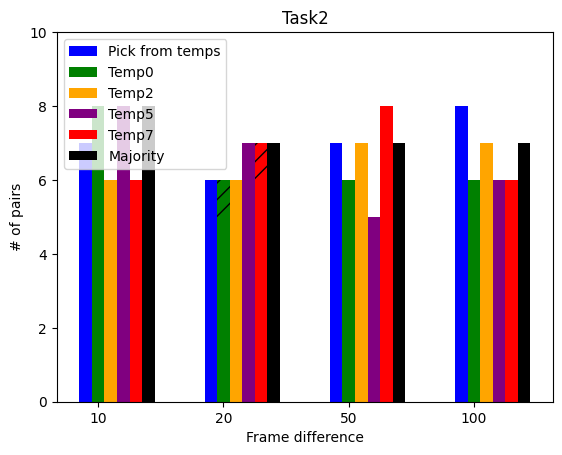

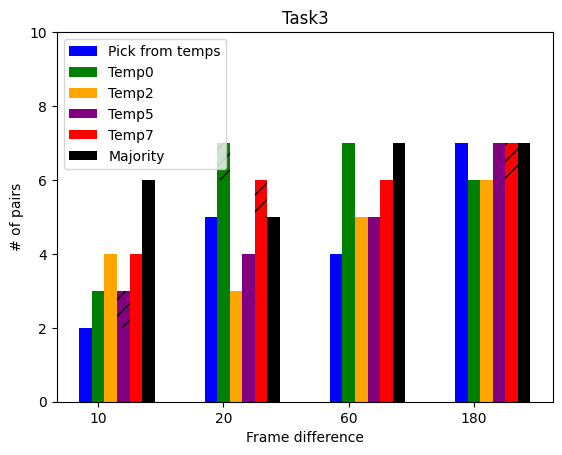

In [21]:
mix_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/quick_eval/counts.json'
temp0_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp0/counts.json'
temp2_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp02/counts.json'
temp5_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp05/counts.json'
temp7_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/temp07/counts.json'
maj_file = '/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs/pick_majority/counts.json'

import json
import os
with open(mix_file) as f:
    mix_data = json.load(f)
with open(temp0_file) as f:
    temp0_data = json.load(f)
with open(temp2_file) as f:
    temp2_data = json.load(f)
with open(temp5_file) as f:
    temp5_data = json.load(f)
with open(temp7_file) as f:
    temp7_data = json.load(f)
with open(maj_file) as f:
    maj_data = json.load(f)

# plot bar chart for each task type and each temp
import matplotlib.pyplot as plt

for task in mix_data.keys():
    labels = mix_data[task].keys()
    correct_mix = [mix_data[task][label]['Correct'] for label in labels]
    unknown_mix = [mix_data[task][label]['Unknown'] for label in labels]
    correct_temp0 = [temp0_data[task][label]['Correct'] for label in labels]
    unknown_temp0 = [temp0_data[task][label]['Unknown'] for label in labels]
    correct_temp2 = [temp2_data[task][label]['Correct'] for label in labels]
    unknown_temp2 = [temp2_data[task][label]['Unknown'] for label in labels]
    correct_temp5 = [temp5_data[task][label]['Correct'] for label in labels]
    unknown_temp5 = [temp5_data[task][label]['Unknown'] for label in labels]
    correct_temp7 = [temp7_data[task][label]['Correct'] for label in labels]
    unknown_temp7 = [temp7_data[task][label]['Unknown'] for label in labels]
    correct_maj = [maj_data[task][label]['Correct'] for label in labels]
    unknown_maj = [maj_data[task][label]['Unknown'] for label in labels]


    # Calculating the total heights
    total_heights_mix = [base + add for base, add in zip(correct_mix, unknown_mix)]
    total_heights_temp0 = [base + add for base, add in zip(correct_temp0, unknown_temp0)]
    total_heights_temp2 = [base + add for base, add in zip(correct_temp2, unknown_temp2)]
    total_heights_temp5 = [base + add for base, add in zip(correct_temp5, unknown_temp5)]
    total_heights_temp7 = [base + add for base, add in zip(correct_temp7, unknown_temp7)]
    total_heights_maj = [base + add for base, add in zip(correct_maj, unknown_maj)]
    

    # Setting up the plot
    fig, ax = plt.subplots()
    x = [i for i in range(len(labels))]
    # Creating the base bars
    # plot the different temps next to each other at the same label
    base_bars_mix = ax.bar(x, correct_mix, label='Mix', color='blue', width=0.1)
    base_bars_temp0 = ax.bar([i + 0.1 for i in x], correct_temp0, label='Temp0', color='green', width=0.1)
    base_bars_temp2 = ax.bar([i + 0.2 for i in x], correct_temp2, label='Temp2', color='orange', width=0.1)
    base_bars_temp5 = ax.bar([i + 0.3 for i in x], correct_temp5, label='Temp5', color='purple', width=0.1)
    base_bars_temp7 = ax.bar([i + 0.4 for i in x], correct_temp7, label='Temp7', color='red', width=0.1)
    base_bars_maj = ax.bar([i + 0.5 for i in x], correct_maj, label='Majority', color='black', width=0.1)


    # Creating the additional bars on top of the base bars
    additional_bars_mix = ax.bar(x, unknown_mix, bottom=correct_mix, label='Mix', color='blue', width=0.1)
    additional_bars_temp0 = ax.bar([i + 0.1 for i in x], unknown_temp0, bottom=correct_temp0, label='Temp0', color='green', width=0.1, hatch='//')
    additional_bars_temp2 = ax.bar([i + 0.2 for i in x], unknown_temp2, bottom=correct_temp2, label='Temp2', color='orange', width=0.1, hatch='//')
    additional_bars_temp5 = ax.bar([i + 0.3 for i in x], unknown_temp5, bottom=correct_temp5, label='Temp5', color='purple', width=0.1 , hatch='//')
    additional_bars_temp7 = ax.bar([i + 0.4 for i in x], unknown_temp7, bottom=correct_temp7, label='Temp7', color='red', width=0.1, hatch='//')
    additional_bars_maj = ax.bar([i + 0.5 for i in x], unknown_maj, bottom=correct_maj, label='Majority', color='black', width=0.1, hatch='//')


    plt.legend((base_bars_mix[0], base_bars_temp0[0], base_bars_temp2[0], base_bars_temp5[0], base_bars_temp7[0], base_bars_maj[0]), ('Pick from temps', 'Temp0', 'Temp2', 'Temp5', 'Temp7', 'Majority'))
    # Setting the y-axis limit
    ax.set_ylim(0, 10)
    ax.set_xlabel("Frame difference")
    ax.set_ylabel("# of pairs")
    # set the x ticks with names
    plt.xticks([i + 0.1 for i in x], labels)
    # Adding a title
    ax.set_title(task)
    out_file = os.path.join('/Users/alexandrasouly/code/chai/demo-voyager/frame_pairs', f'bars_{task}.png')
    plt.savefig(out_file, bbox_inches='tight', dpi=300)
    print(f"Saved {out_file}")

